## EDA Analysis
Table iar_ocupaciones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
def millions(x, pos):
    return f'{x * 1e-6:.1f}M'  # Convert to millions and format with one decimal place


def graph(x1, y1, ylabel1, y2, ylabel2):
    fig, ax = plt.subplots(2, 1, figsize=(24, 10), sharex=True)

    ax[0].plot(x1, y1, color='blue', label=ylabel1, marker='o', linestyle='-', linewidth=2)
    ax[0].set_title(f'{ylabel1} Over Time')
    ax[0].set_xlabel("Date")
    ax[0].set_ylabel(f'{ylabel1} (in Millions)')
    ax[0].yaxis.set_major_formatter(FuncFormatter(millions))  # Apply the formatter to the y-axis
    ax[0].tick_params(axis='x', which='both', labelbottom=True)
    ax[0].legend()

    ax[1].plot(x1, y2, color='red', label=ylabel2, marker='o', linestyle='-', linewidth=2)
    ax[1].set_title(f'{ylabel2} Over Time')
    ax[1].set_xlabel("Date")
    ax[1].set_ylabel(f'{ylabel2} (in Millions)')
    ax[1].yaxis.set_major_formatter(FuncFormatter(millions))  # Apply the formatter to the y-axis
    ax[1].tick_params(axis='x', which='both', labelbottom=True)
    ax[1].legend()

    # Add grid lines
    for axis in ax:
        axis.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
        axis.grid(True, linestyle='--', alpha=0.5)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

def histogram(column, label, threshold=0):
    plt.figure(figsize=(24, 6))
    columna = column.value_counts()

    # less_than = columna[columna < threshold].sum()
    main = columna[columna >= threshold]

    # pd.concat([main, pd.Series({'Other': less_than})]).plot(kind='bar', color='skyblue', edgecolor='black')
    main.plot(kind='bar', color='skyblue', edgecolor='black')

    # Add title and labels
    plt.title(f'Occurrences of Each Factor in {label}')
    plt.xlabel(label)
    plt.ylabel('Count')

    # Show the plot
    plt.show()

In [3]:
df2 = pd.read_csv("iar_ocupaciones.csv")

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3405916 entries, 0 to 3405915
Data columns (total 56 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Fecha_hoy                object 
 1   ID_Entidad_Fed           int64  
 2   ID_Agencia               int64  
 3   ID_Tipo_Habitacion       int64  
 4   ID_canal                 int64  
 5   ID_Programa              int64  
 6   ID_Paquete               int64  
 7   ing_hab                  float64
 8   aa_ing_hab               float64
 9   ing_hab_nocoruso         float64
 10  aa_ing_hab_nocoruso      float64
 11  ing_hab_uso              float64
 12  aa_ing_hab_uso           float64
 13  ing_hab_cor              float64
 14  aa_ing_hab_cor           float64
 15  ing_hab_intercambios     float64
 16  aa_ing_hab_intercambios  float64
 17  cto_noc                  int64  
 18  aa_cto_noc               int64  
 19  cto_noc_nocoruso         int64  
 20  aa_cto_noc_nocoruso      int64  
 21  cto_noc_

In [5]:
df = df2.drop_duplicates()
df['Fecha_hoy'] = pd.to_datetime(df['Fecha_hoy'])

/tmp/ipykernel_17259/2194034033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecha_hoy'] = pd.to_datetime(df['Fecha_hoy'])


In [6]:
print(len(df2)) 
print(len(df))

3405916
3405284


In [7]:
abs(len(df2) - len(df))

632

In [8]:
df.columns

Index(['Fecha_hoy', 'ID_Entidad_Fed', 'ID_Agencia', 'ID_Tipo_Habitacion',
       'ID_canal', 'ID_Programa', 'ID_Paquete', 'ing_hab', 'aa_ing_hab',
       'ing_hab_nocoruso', 'aa_ing_hab_nocoruso', 'ing_hab_uso',
       'aa_ing_hab_uso', 'ing_hab_cor', 'aa_ing_hab_cor',
       'ing_hab_intercambios', 'aa_ing_hab_intercambios', 'cto_noc',
       'aa_cto_noc', 'cto_noc_nocoruso', 'aa_cto_noc_nocoruso', 'cto_noc_uso',
       'aa_cto_noc_uso', 'cto_noc_cor', 'aa_cto_noc_cor', 'ADR', 'aa_ADR',
       'otr_ing', 'aa_otr_ing', 'cto_ing_res', 'cto_age', 'cto_est',
       'ing_extras', 'ing_impuestos', 'ing_base', 'ing_exento', 'ID_empresa',
       'ID_edificio', 'num_adu', 'aa_num_adu', 'num_adu_nocoruso',
       'aa_num_adu_nocoruso', 'TREVPEC', 'aa_TREVPEC', 'num_men', 'aa_num_men',
       'num_men_nocoruso', 'aa_num_men_nocoruso', 'num_meg', 'num_inf',
       'num_jun', 'ID_Segmento_Mercado', 'ID_Segmento_Alterno',
       'ID_Segmento_Comp', 'moneda_cve', 'ID_Empresa2'],
      dtype='object'

### Group By Date

In [9]:
df.head()

,Fecha_hoy,ID_Entidad_Fed,ID_Agencia,ID_Tipo_Habitacion,ID_canal,ID_Programa,ID_Paquete,ing_hab,aa_ing_hab,ing_hab_nocoruso,...,num_men_nocoruso,aa_num_men_nocoruso,num_meg,num_inf,num_jun,ID_Segmento_Mercado,ID_Segmento_Alterno,ID_Segmento_Comp,moneda_cve,ID_Empresa2
0,2021-11-15,173,305,13,1,1,1,0.0,0.000000,0.0,...,0,0,0,0,0,6,17,34,2,7
1,2021-11-15,173,305,14,0,1,1,0.0,57.086842,0.0,...,0,0,0,0,0,6,17,34,2,7
2,2021-11-15,173,305,14,1,1,1,0.0,0.000000,0.0,...,0,0,0,0,0,6,17,34,1,7
3,2021-11-15,173,305,14,1,1,1,0.0,0.000000,0.0,...,0,0,0,0,0,6,17,34,2,7
4,2021-11-15,173,305,19,3,1,1,0.0,774.750978,0.0,...,0,0,0,0,0,6,17,34,2,7


In [10]:
# Dataframe for numerical columns and date
df_num = df[['Fecha_hoy', 'ing_hab', 'aa_ing_hab',
             'ing_hab_nocoruso', 'aa_ing_hab_nocoruso']]
df_num['monthly'] = df['Fecha_hoy'].dt.strftime('%Y-%m')
df_num = df_num.drop("Fecha_hoy", axis=1)
df_num.head()

/tmp/ipykernel_17259/687536581.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['monthly'] = df['Fecha_hoy'].dt.strftime('%Y-%m')


,ing_hab,aa_ing_hab,ing_hab_nocoruso,aa_ing_hab_nocoruso,monthly
0,0.0,0.000000,0.0,0.000000,2021-11
1,0.0,57.086842,0.0,57.086842,2021-11
2,0.0,0.000000,0.0,0.000000,2021-11
3,0.0,0.000000,0.0,0.000000,2021-11
4,0.0,774.750978,0.0,774.750978,2021-11


#### ing_hab and aa_ing_hab over time

In [11]:
df_num = df_num.groupby(by="monthly").sum()

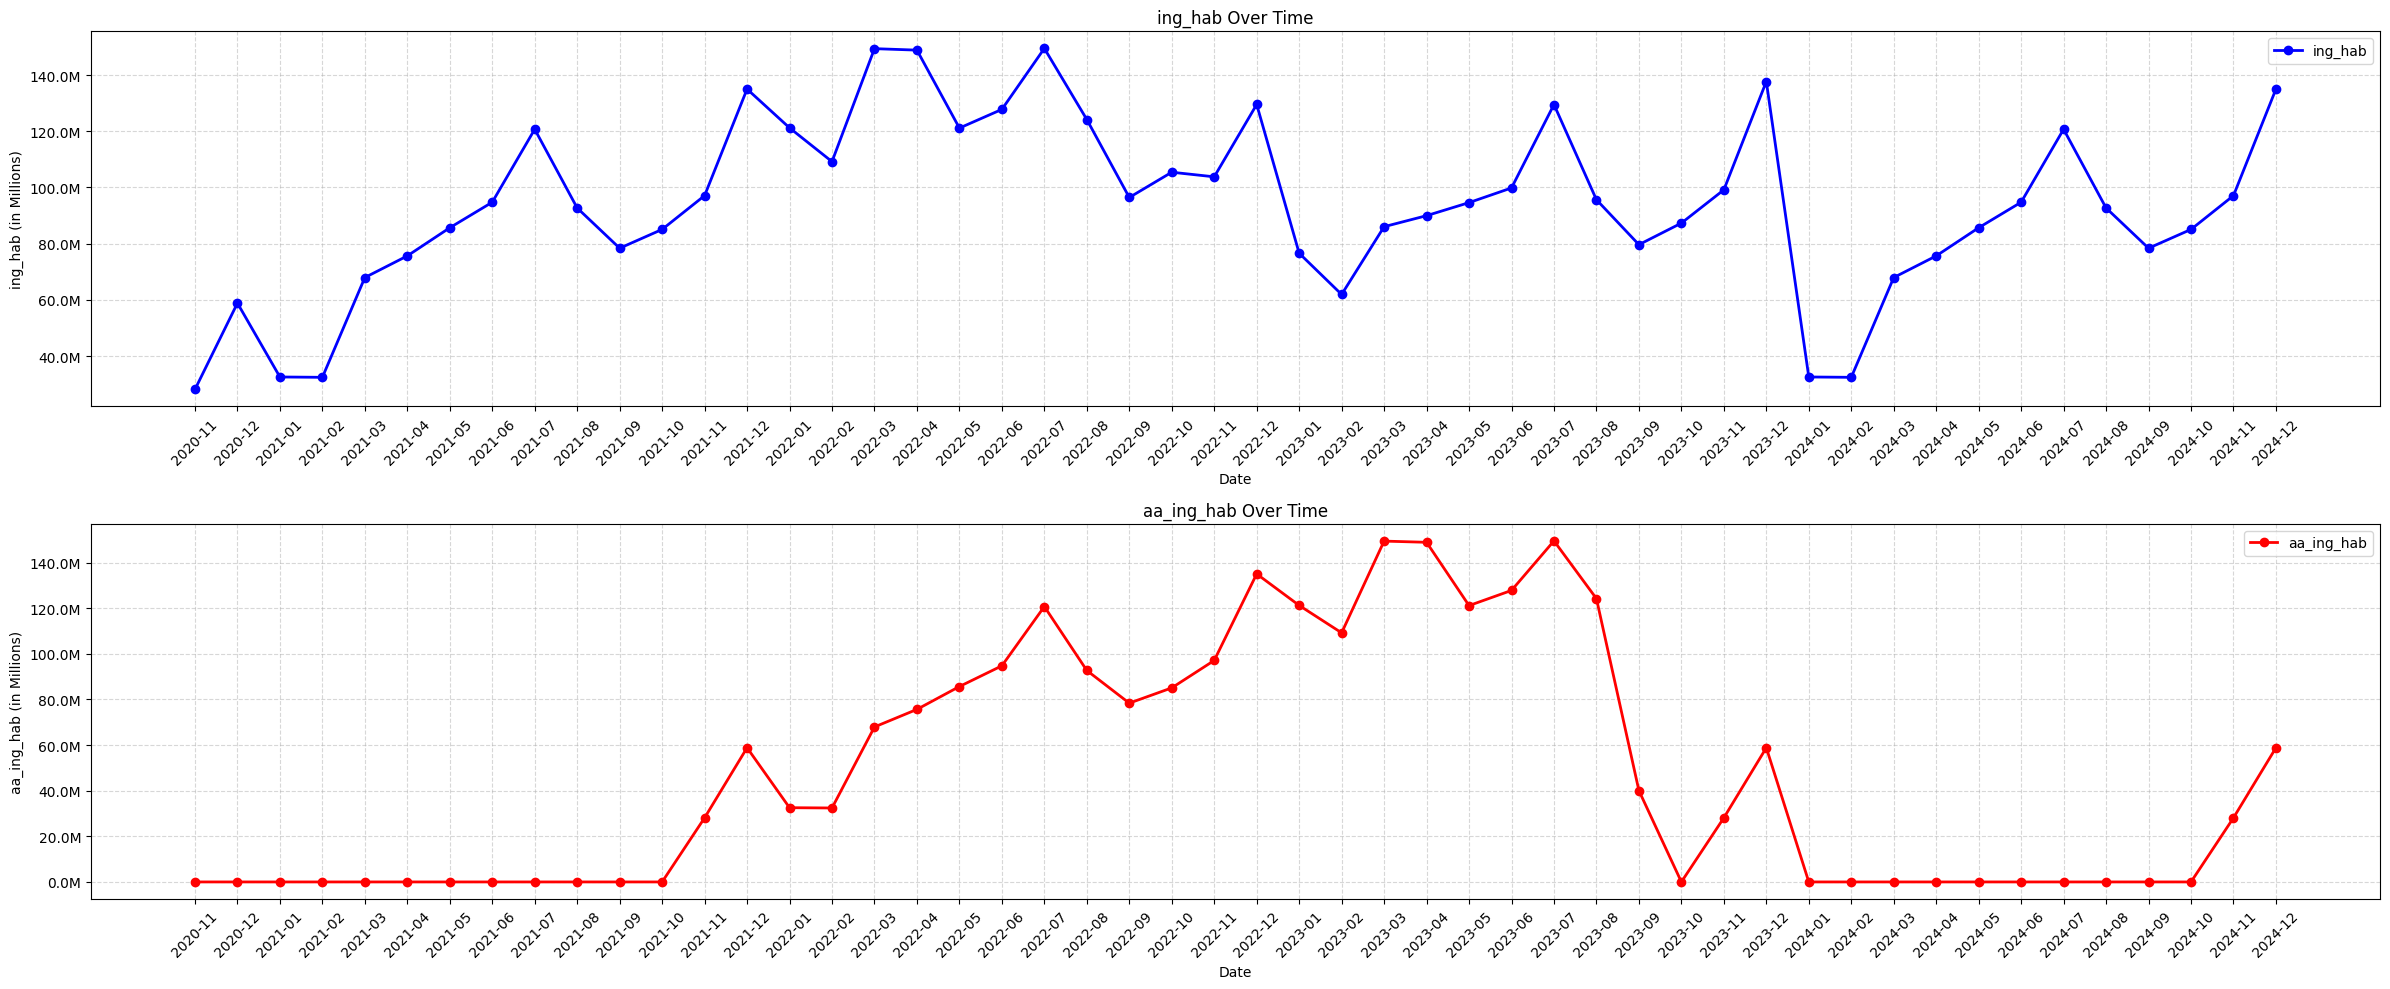

In [12]:
graph(df_num.index, df_num["ing_hab"], "ing_hab", df_num["aa_ing_hab"], "aa_ing_hab")


#### ing_hab_nocoruso and aa_ing_hab_nocoruso over time

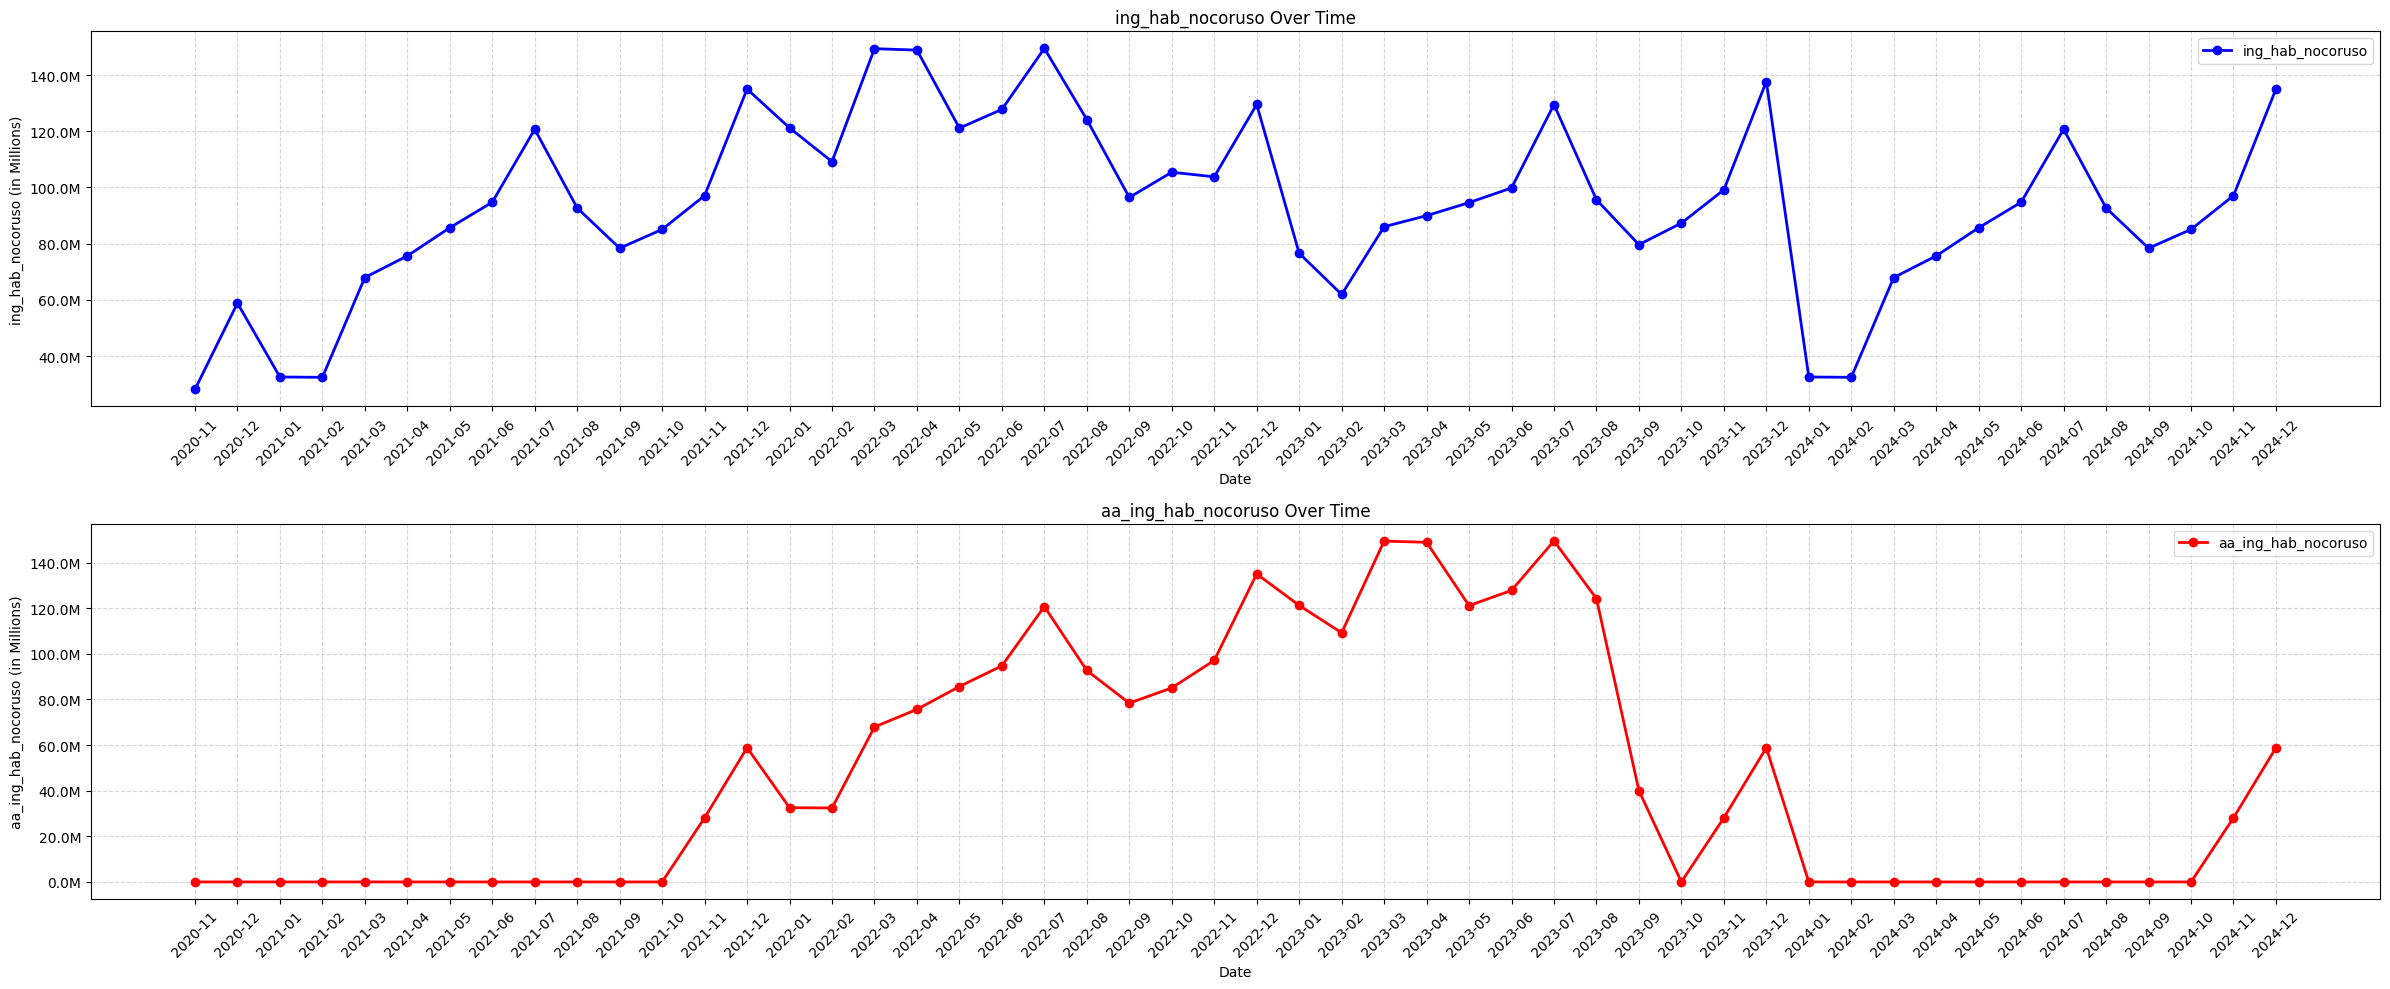

In [13]:
graph(df_num.index, df_num["ing_hab_nocoruso"], "ing_hab_nocoruso", df_num["aa_ing_hab_nocoruso"], "aa_ing_hab_nocoruso")

### Histograms

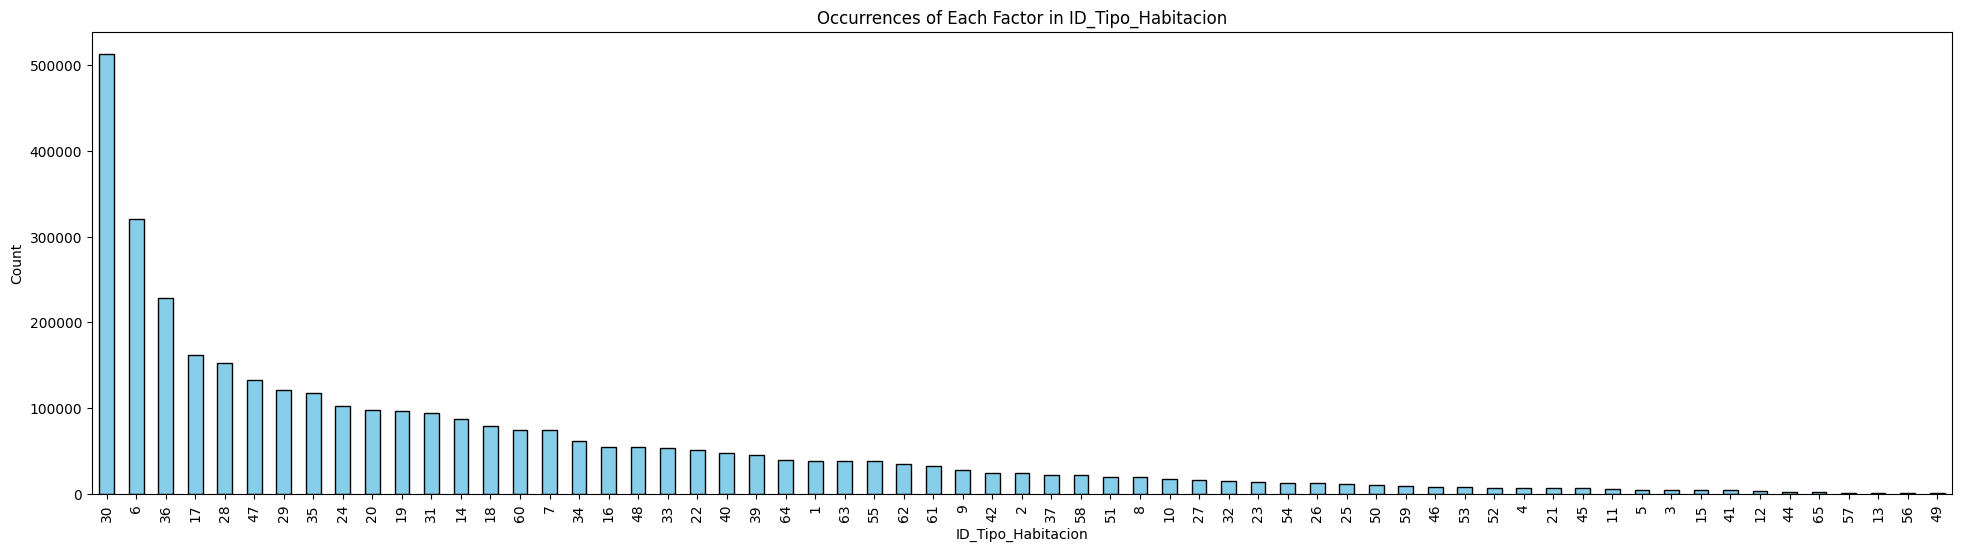

In [14]:
histogram(df["ID_Tipo_Habitacion"], "ID_Tipo_Habitacion", 1000)

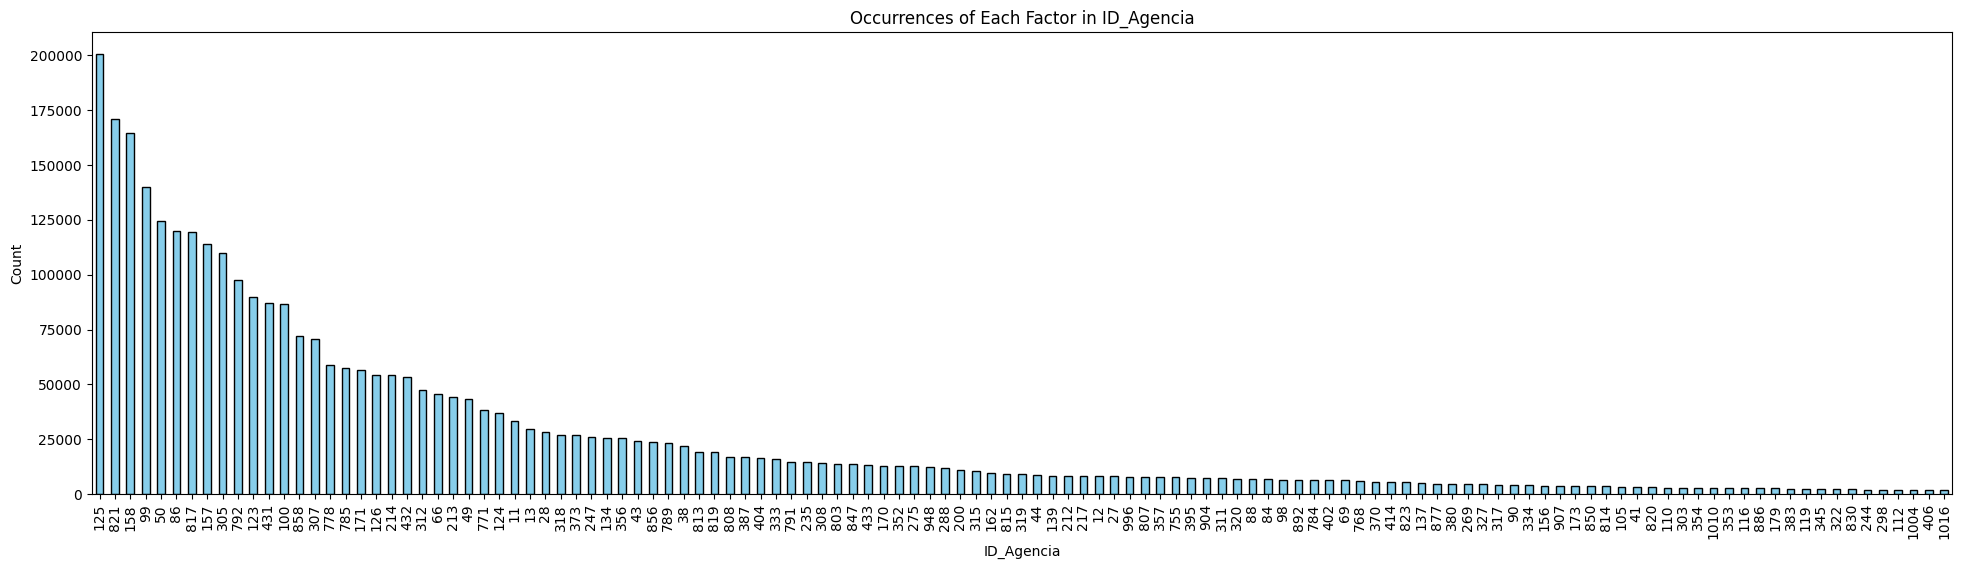

In [15]:
histogram(df["ID_Agencia"], "ID_Agencia", 2000)

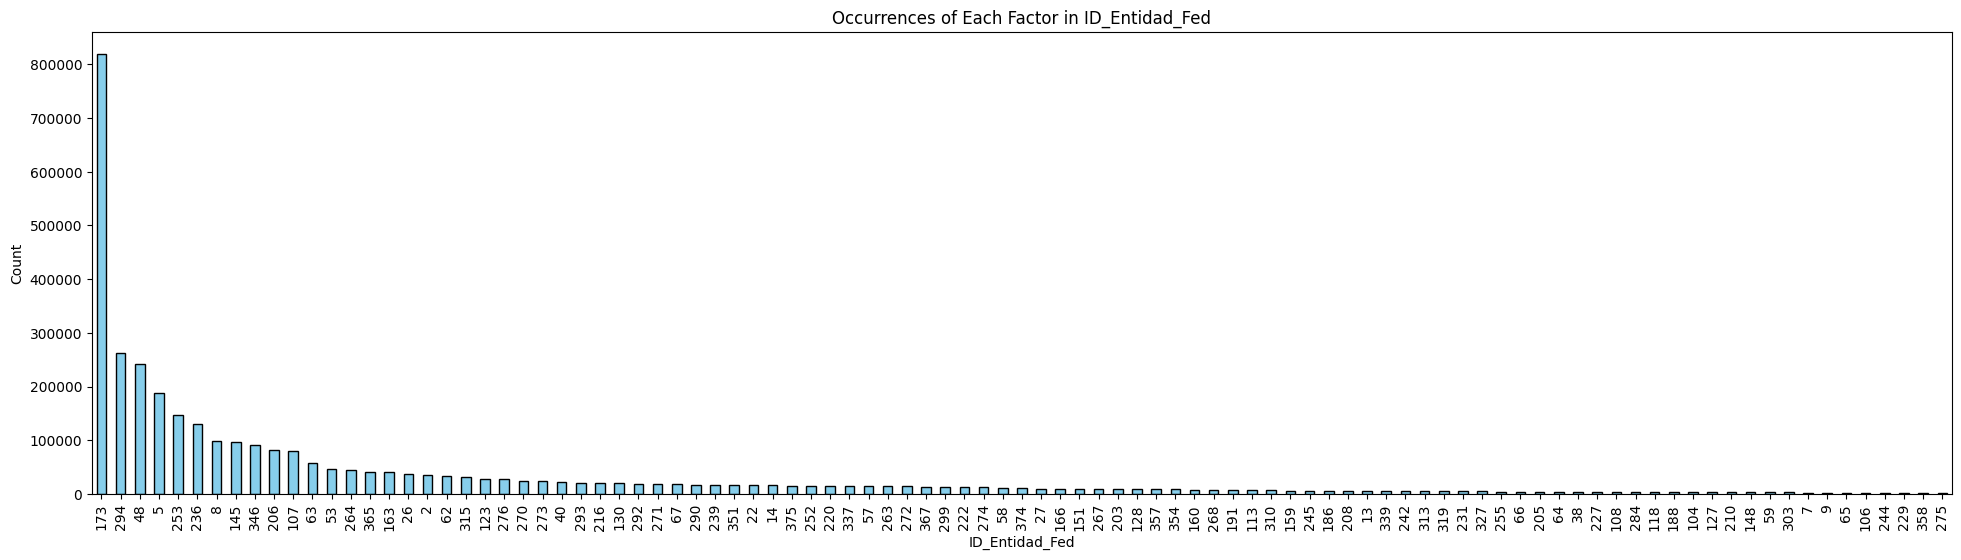

In [16]:
histogram(df["ID_Entidad_Fed"], "ID_Entidad_Fed", 2000)

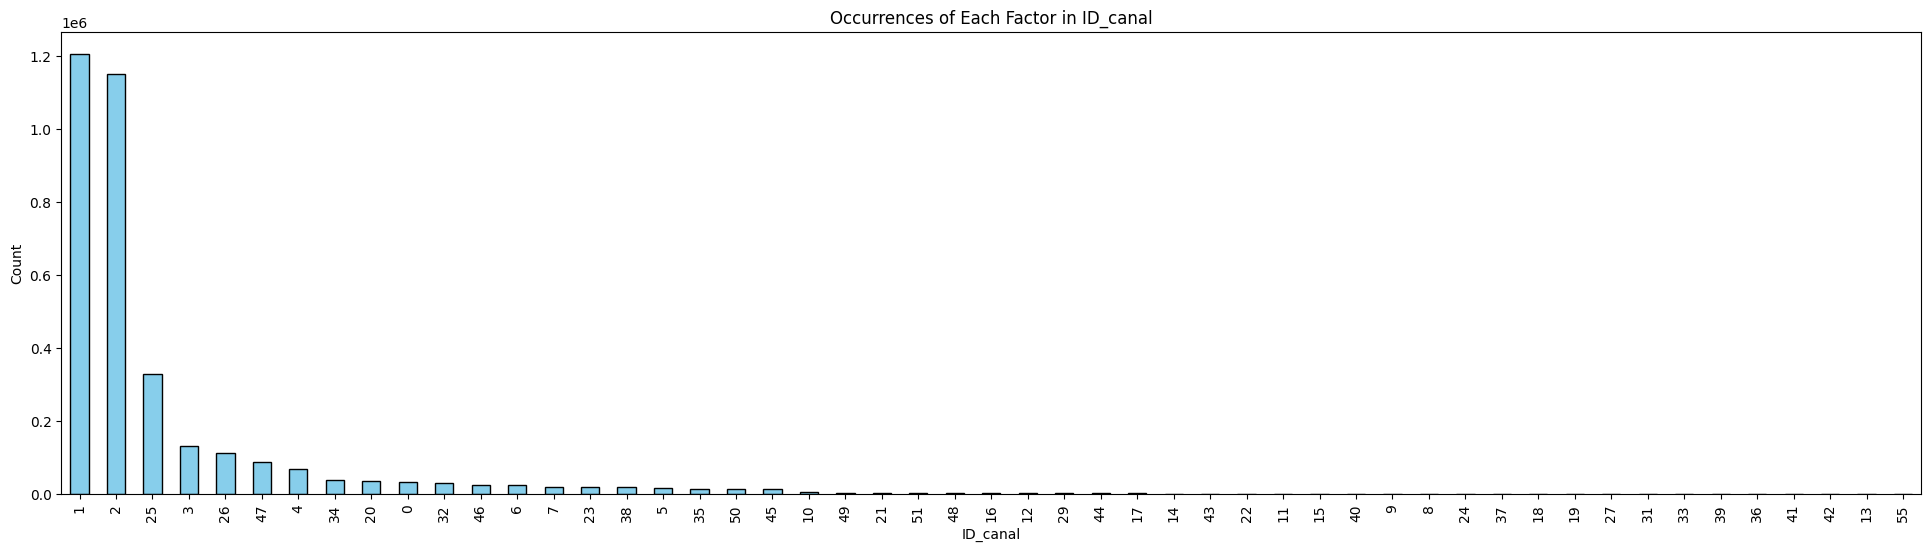

In [17]:
histogram(df["ID_canal"], "ID_canal")

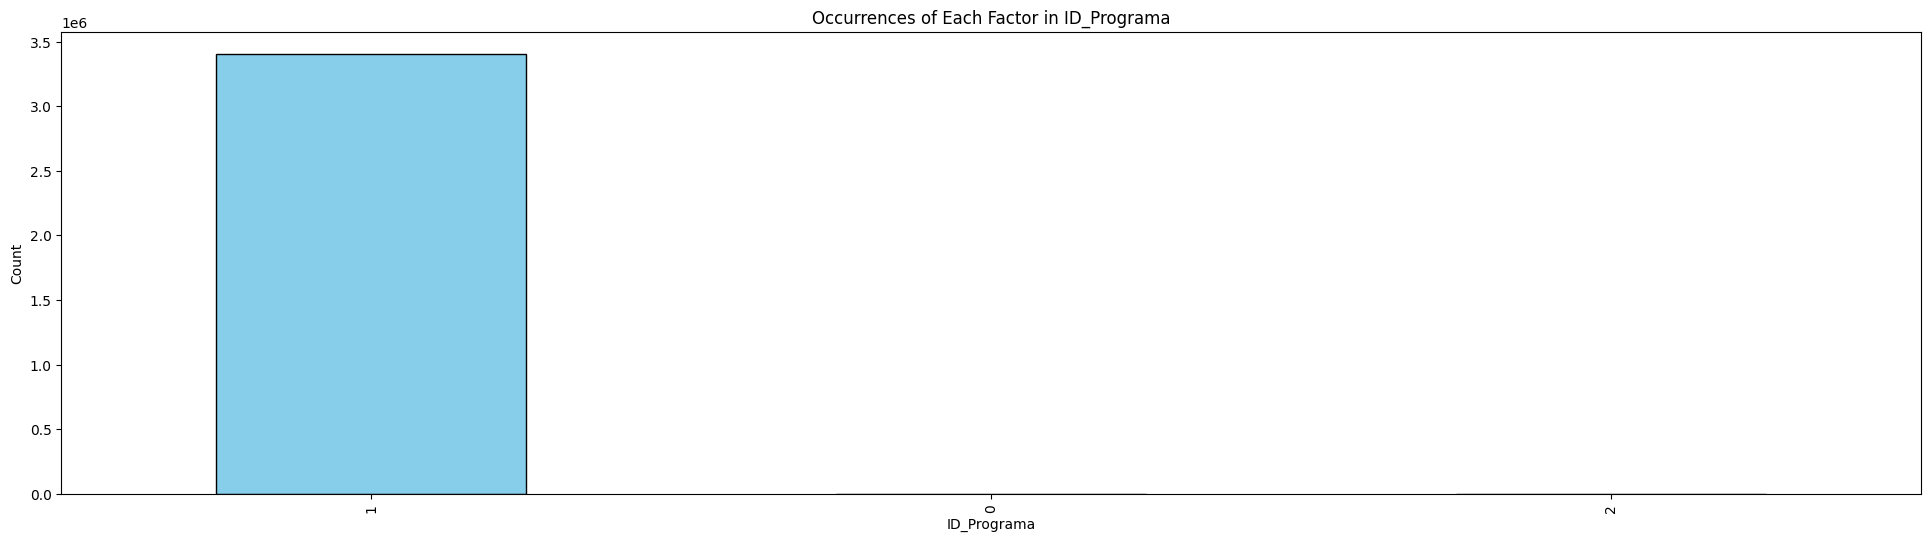

In [18]:
histogram(df["ID_Programa"], "ID_Programa")

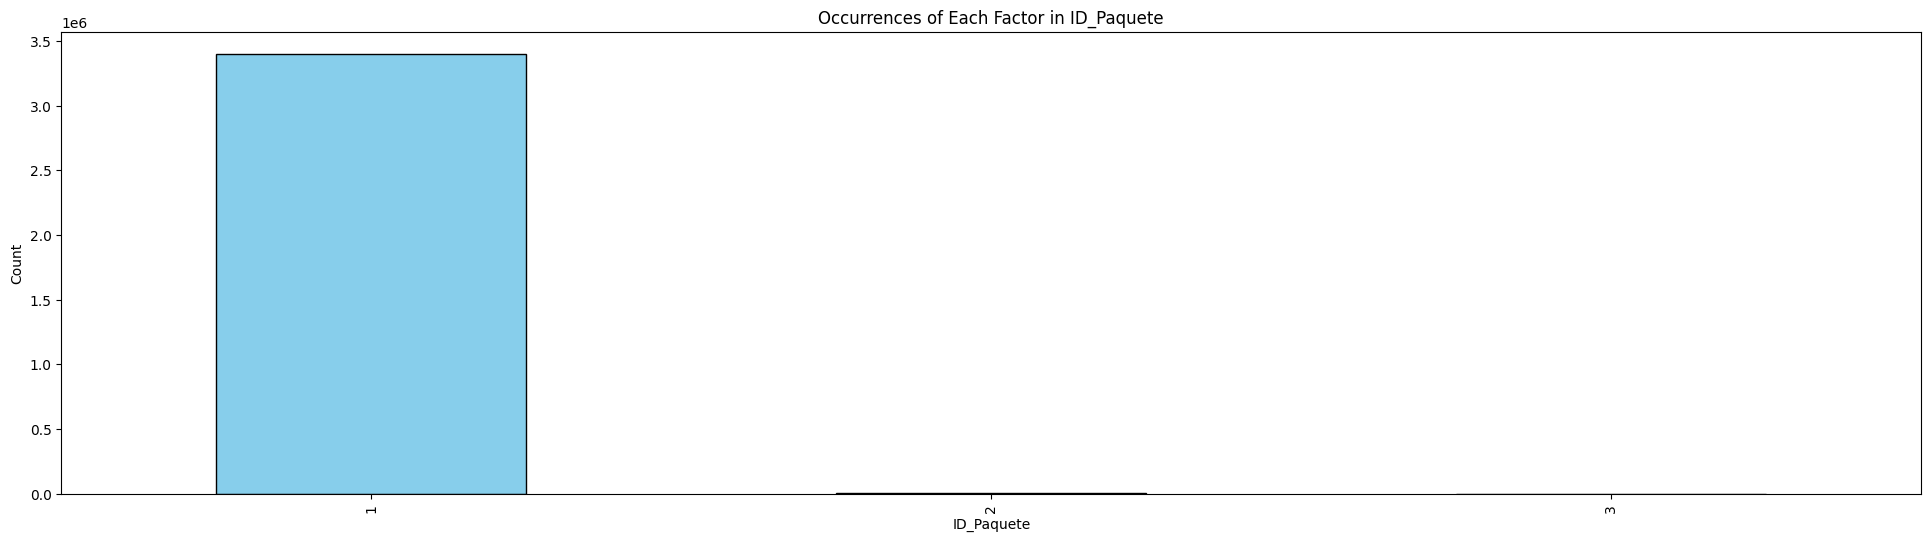

In [19]:
histogram(df["ID_Paquete"], "ID_Paquete")

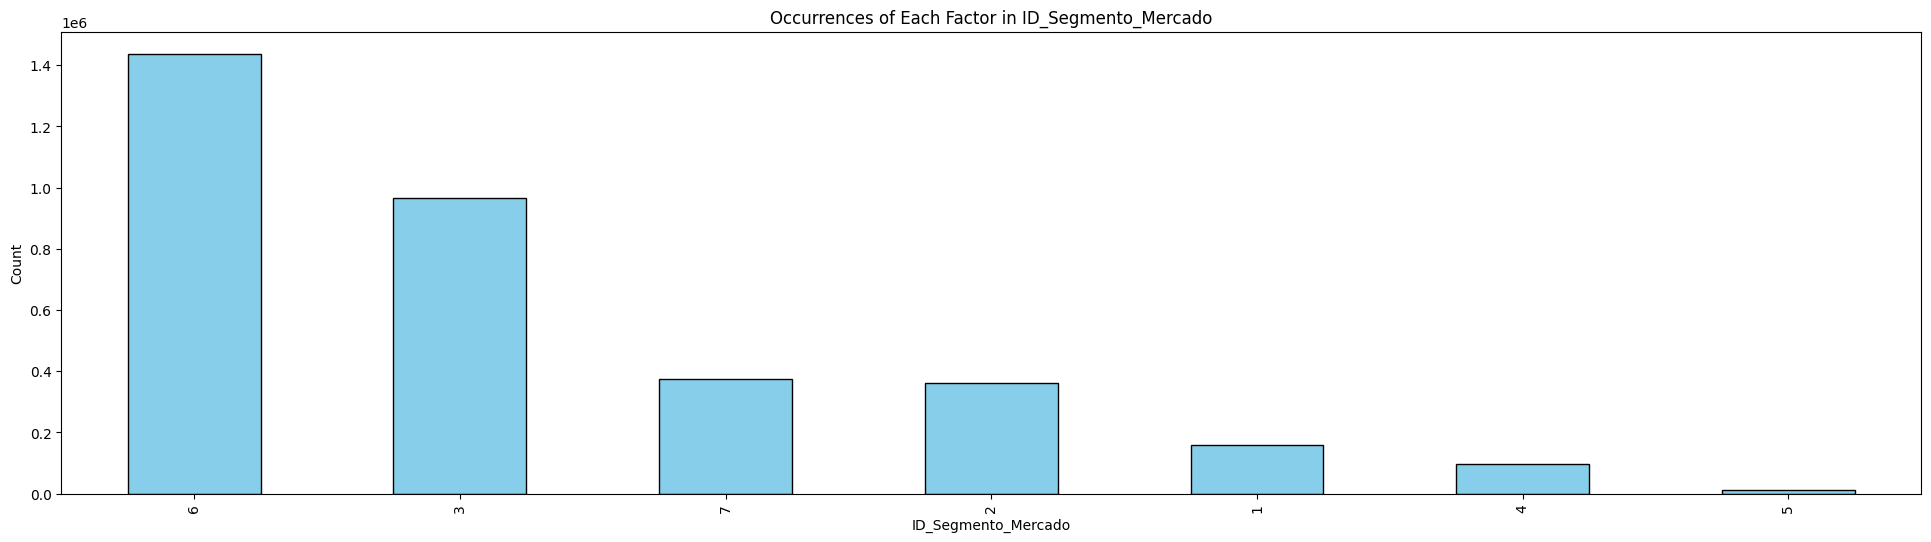

In [20]:
histogram(df["ID_Segmento_Mercado"], "ID_Segmento_Mercado")

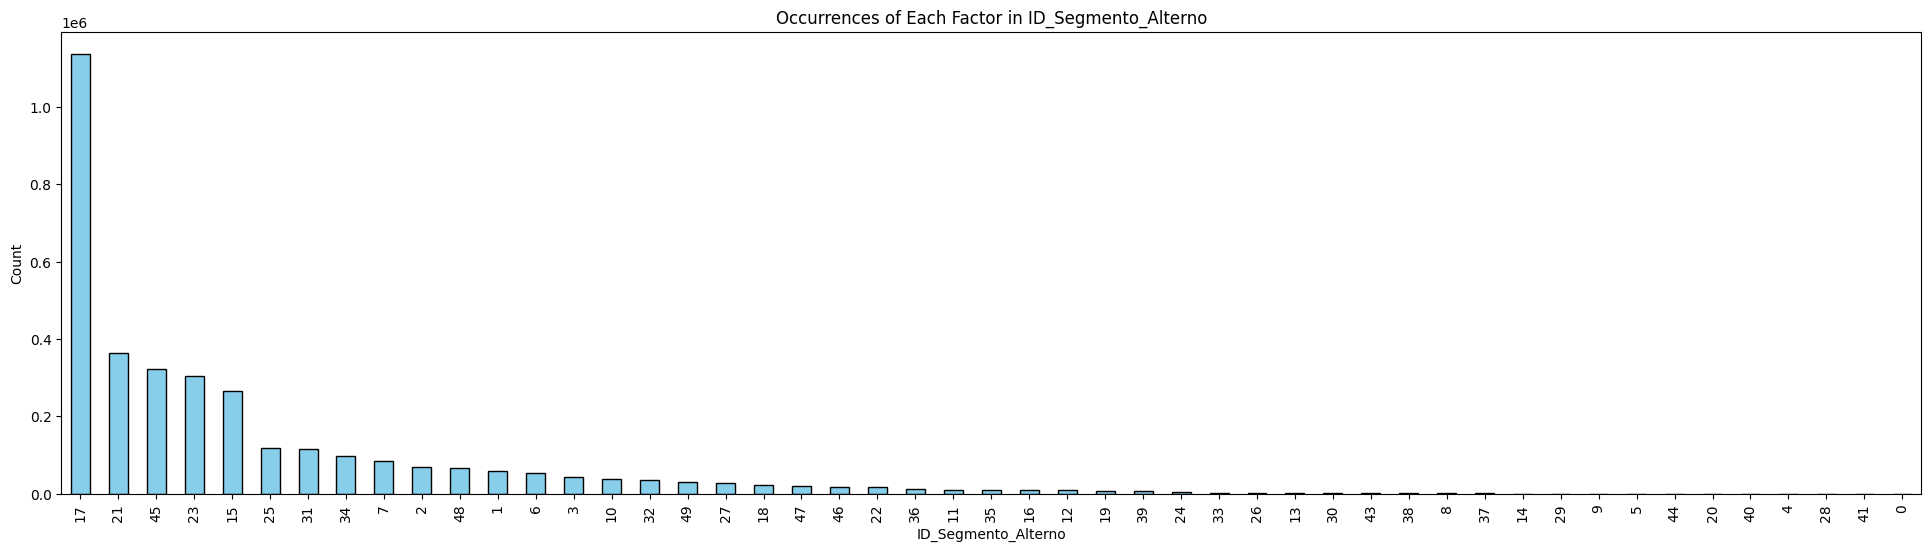

In [21]:
histogram(df["ID_Segmento_Alterno"], "ID_Segmento_Alterno")

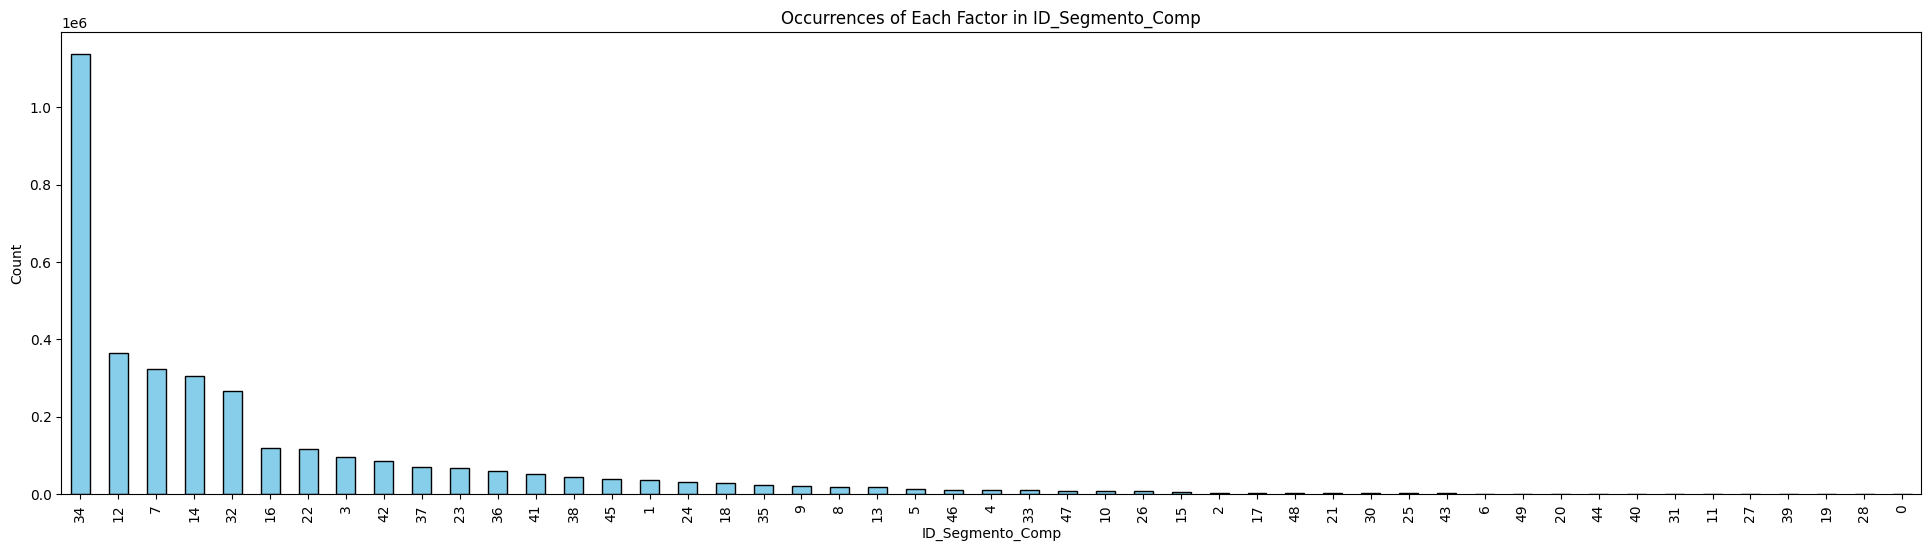

In [22]:
histogram(df["ID_Segmento_Comp"], "ID_Segmento_Comp")

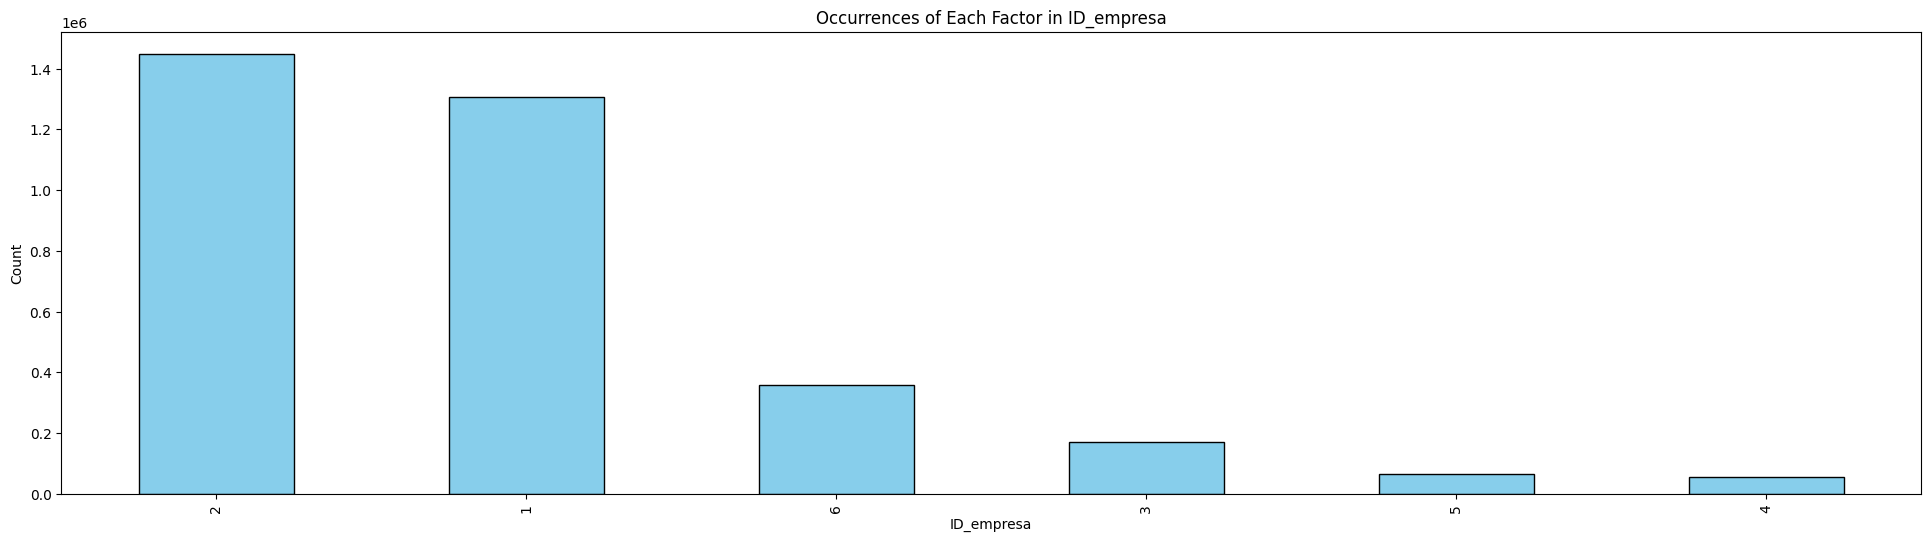

In [23]:
histogram(df["ID_empresa"], "ID_empresa")

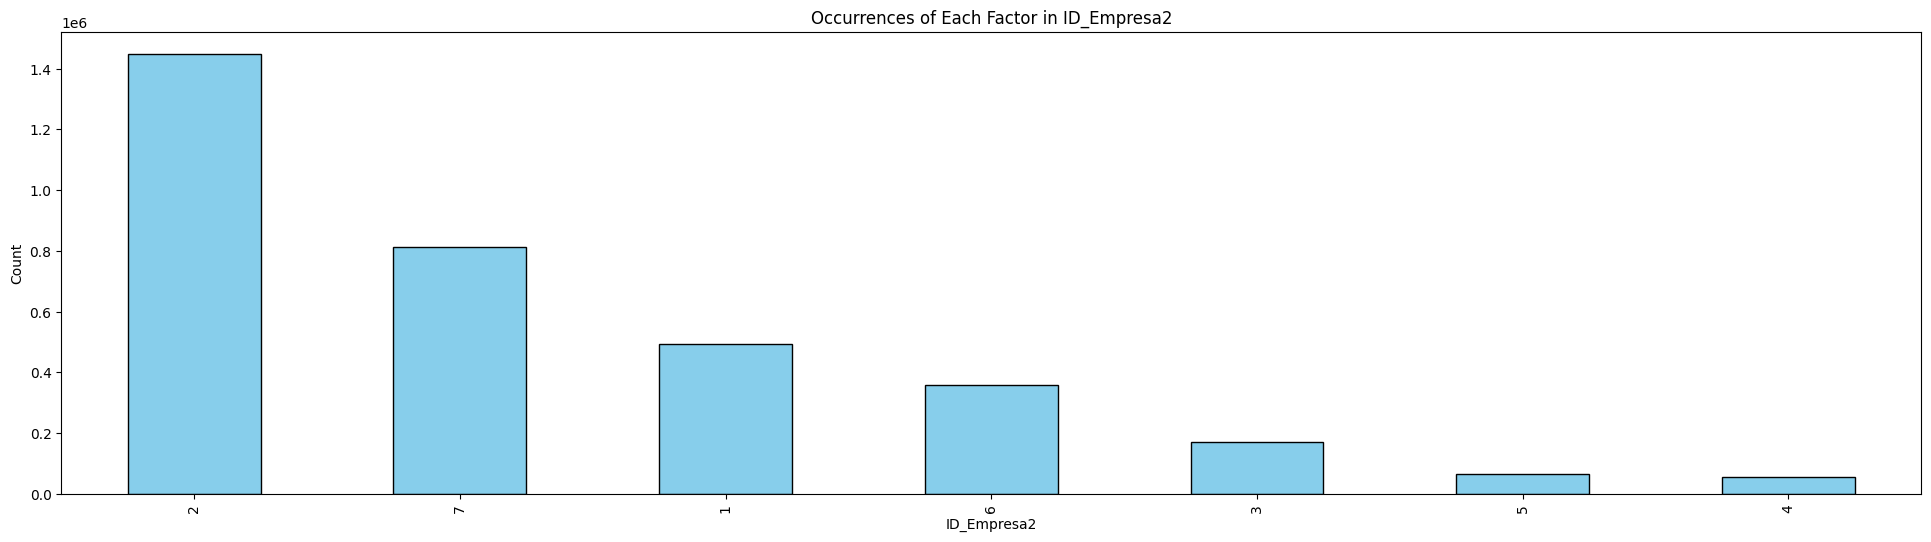

In [24]:
histogram(df["ID_Empresa2"], "ID_Empresa2")